In [9]:
import ROOT
from ROOT import RooRealVar,RooCBShape,RooDataHist,RooArgList,RooFit
import csv
import json
import array as array

In [2]:
reader = csv.reader(open('../data/intercalibration19C.csv', 'r'))
dict_run_cryst = {}
for row in reader:
    run,energy,crystal,_ = row
    if energy=='149.12' :
        #print(run,energy,crystal)
        dict_run_cryst[crystal] = run
print(dict_run_cryst)
    


{'A1': '13398', 'A2': '13399', 'A3': '13400', 'B1': '13401', 'B2': '13402', 'B3': '13403', 'B4': '13404', 'B5': '13405', 'C1': '13406', 'C5': '13407', 'D5': '13408', 'D4': '13409', 'D3': '13410', 'D2': '13411', 'D1': '13412', 'E1': '13413', 'E2': '13414', 'E3': '13415'}


In [3]:
##Now add runs for C2,C3,C4 
reader = csv.reader(open('../data/energyscans19C.csv', 'r'))
for row in reader:
    run,energy,crystal,_,_,_ = row
    if energy=='149.12' and  (crystal=='C3' or crystal=='C2' or crystal=='C4' ) :
        dict_run_cryst[crystal] = run
        
print(dict_run_cryst)

{'A1': '13398', 'A2': '13399', 'A3': '13400', 'B1': '13401', 'B2': '13402', 'B3': '13403', 'B4': '13404', 'B5': '13405', 'C1': '13406', 'C5': '13407', 'D5': '13408', 'D4': '13409', 'D3': '13410', 'D2': '13411', 'D1': '13412', 'E1': '13413', 'E2': '13414', 'E3': '13415', 'C3': '13416', 'C2': '13377', 'C4': '13378'}


In [4]:
## Read crystal centers prepared by Simone 
reader = csv.reader(open('../data/crystalscenters.csv', 'r'))
dict_crystal_centers={}
for row in reader:
    crystal,xpos,ypos = row
    if crystal!='Crystal' :
        dict_crystal_centers[crystal] = [int(xpos),int(ypos)]
print(dict_crystal_centers)

{'A1': [-5, 6], 'A2': [-4, 4], 'A3': [-3, 4], 'B1': [-5, 5], 'B2': [-5, 4], 'B3': [-3, 4], 'B4': [-3, 5], 'B5': [-3, 7], 'C1': [-3, 4], 'C2': [-4, 5], 'C3': [-4, 4], 'C4': [-4, 4], 'C5': [-4, 5], 'D1': [-2, 5], 'D2': [-3, 4], 'D3': [-2, 4], 'D4': [-3, 4], 'D5': [-3, 5], 'E1': [-2, 4], 'E2': [-3, 3], 'E3': [-1, 3]}


In [6]:
naming = []
for i in range(5,0,-1):
    naming.append('A%d'%i)
    naming.append('B%d'%i)
    naming.append('C%d'%i)
    naming.append('D%d'%i)
    naming.append('E%d'%i)
missing = 'A5,A4,E5,E4'.split(',')
working = [item for item in naming]
for item in missing:
    working.remove(item)
print(naming)

['A5', 'B5', 'C5', 'D5', 'E5', 'A4', 'B4', 'C4', 'D4', 'E4', 'A3', 'B3', 'C3', 'D3', 'E3', 'A2', 'B2', 'C2', 'D2', 'E2', 'A1', 'B1', 'C1', 'D1', 'E1']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots/crystal_map.pdf has been created
Info in <TCanvas::Print>: png file plots/crystal_map.png has been created


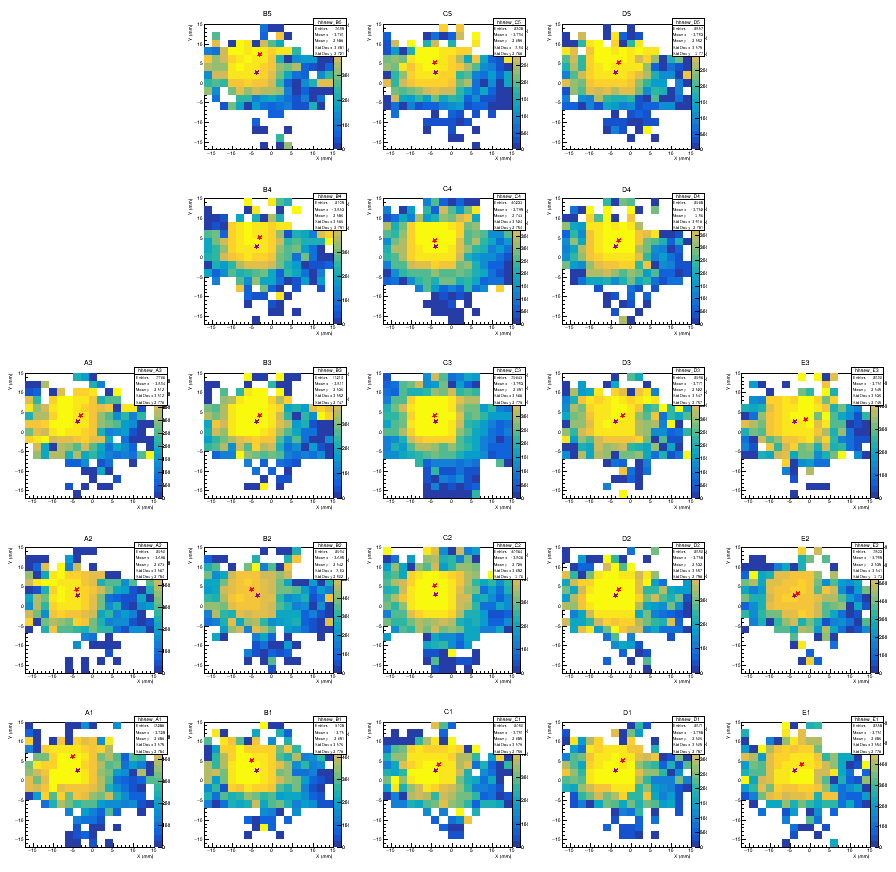

In [19]:
crystal_maps=[]
c = ROOT.TCanvas("c","c",900,900)
c.Divide(5,5)
canvas_num=0
files=[]
grmax=[]
grmaxSimone=[]
file_num = 0
for crystal in naming:
    if crystal in missing:
        canvas_num+=1
    else :
        c.cd(canvas_num+1)
    
        run = dict_run_cryst[crystal]
        files.append(ROOT.TFile("/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_%s.root"%run))
        tree = files[file_num].Get("h4")
        
        tree.Draw("fit_ampl[%s]:Y:X>>hhnew2_%s(6,-15,15,6,-15,15,0,10000)"%(crystal,crystal),"n_tracks==1","PROFCOLZ")
        htemp2 = ROOT.gPad.GetPrimitive("hhnew2_%s"%crystal)
        xmax =  htemp2.GetMean(1)
        ymax = htemp2.GetMean(2)
        
        tree.Draw("fit_ampl[%s]:Y:X>>hhnew_%s(15,-15,15,15,-15,15,0,10000)"%(crystal,crystal),"n_tracks==1","PROFCOLZ")
        hist2d = ROOT.gPad.GetPrimitive("hhnew_%s"%crystal)
        hist2d.SetTitle(crystal)
        hist2d.GetXaxis().SetTitle('X (mm)')
        hist2d.GetYaxis().SetTitle('Y (mm)')
        hist2d.Draw("PROFCOLZsame")
        crystal_maps.append(hist2d)
    
        
        
        hist2d.GetXaxis().SetRange(hist2d.GetXaxis().FindBin(-10),hist2d.GetXaxis().FindBin(10))
        hist2d.GetYaxis().SetRange(hist2d.GetYaxis().FindBin(-10),hist2d.GetYaxis().FindBin(10))
        
        hist2d.GetXaxis().SetRange(0,hist2d.GetNbinsX())
        hist2d.GetYaxis().SetRange(0,hist2d.GetNbinsY())
        
        grmax.append(ROOT.TGraph(1,array.array( 'd' ,[xmax]),array.array( 'd' ,[ymax])))
        grmax[file_num].SetMarkerColor(ROOT.kMagenta+2);
        grmax[file_num].SetMarkerStyle(29);
        grmax[file_num].Draw("LPsame")
        
        
        grmaxSimone.append(ROOT.TGraph(1,array.array( 'd' ,[dict_crystal_centers[crystal][0]]),array.array( 'd' ,[dict_crystal_centers[crystal][1]])))
        grmaxSimone[file_num].SetMarkerColor(2);
        grmaxSimone[file_num].SetMarkerStyle(29);
        grmaxSimone[file_num].Draw("LPsame")
        
        file_num+=1
        canvas_num+=1
c.Draw()
c.SaveAs('plots/crystal_map.pdf')
c.SaveAs('plots/crystal_map.png')


here
0
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13400.root
peak_postion 4850.0
100
############################ Sumit ##################################
roohist_fit_A3
<cppyy.gbl.RooFitResult object at 0x(nil)>
1
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13416.root
peak_postion 4790.0
100
############################ Sumit ##################################
roohist_fit_C3
<cppyy.gbl.RooFitResult object at 0x(nil)>
2
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13403.root
peak_postion 5250.0
100
############################ Sumit ##################################
roohist_fit_B3
<cppyy.gbl.RooFitResult object at 0x(nil)>
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **  136 **SET PRINT           1
 **********
 **********
 **  137 **SET NOGR

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots/fits.pdf has been created
Info in <TCanvas::Print>: png file plots/fits.png has been created


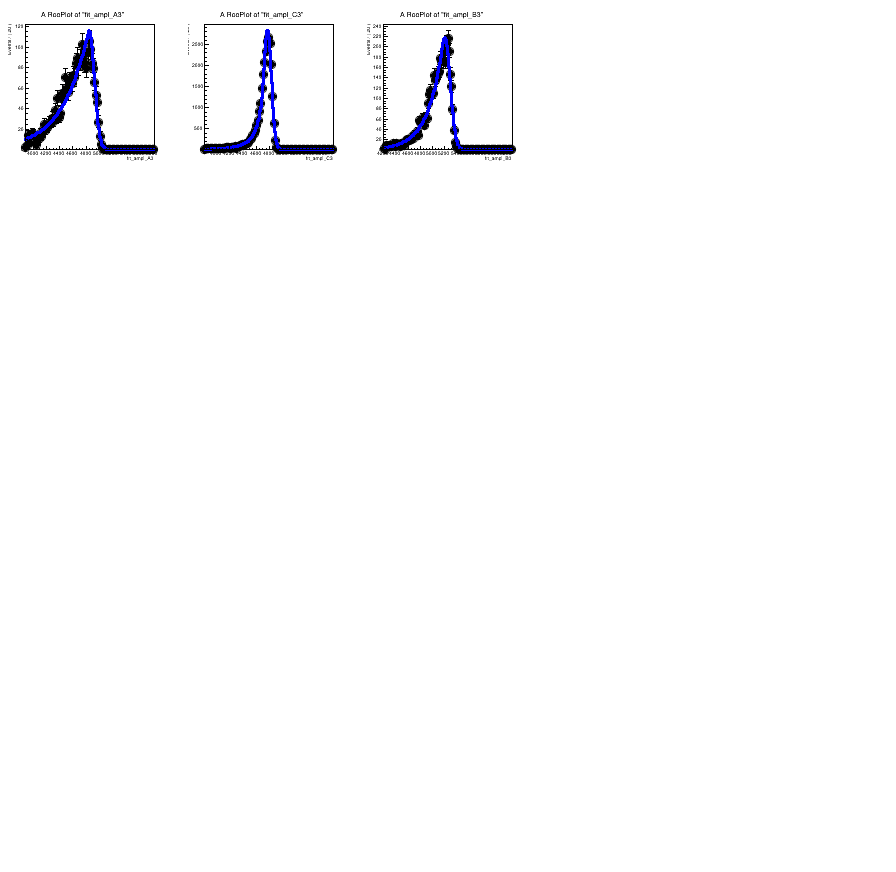

In [26]:
pos_cut = 3

c = ROOT.TCanvas("c","c",900,900)
c.Divide(5,5)
canvas_num=0
files=[]
file_num=0
chi2s = []
results = []
hists_fits=[]
trees=[]
x,roohist,m,s,a,n,sig,res,frame = [],[],[],[],[],[],[],[],[]
print ('here')
#for crystal_num in range(0,len(naming)):
#for crystal_num in range(0,3):
#for crystal in naming:
for crystal in ['A3','C3','B3']:
    if crystal in missing:
        canvas_num+=1
    else :
        c.cd(canvas_num+1) 
        print (canvas_num)
        
        run = dict_run_cryst[crystal]
        files.append(ROOT.TFile("/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_%s.root"%run))
        trees.append(files[file_num].Get("h4"))
        print(files[file_num].GetName())        
    
        hist_ampl = ROOT.TH1F("hist_ampl_%s"%crystal,"hist_ampl_%s"%crystal,300,2000,8000)
        trees[file_num].Draw("fit_ampl[%s]>>hist_ampl_%s"%(crystal,crystal),"n_tracks==1 && fabs(X-(%.2f))<%.2f && fabs(Y-(%.2f))<%.2f"%(dict_crystal_centers[crystal][0],pos_cut,dict_crystal_centers[crystal][1],pos_cut),"")
        peak_position = hist_ampl.GetXaxis().GetBinCenter(hist_ampl.GetMaximumBin())
        print("peak_postion",peak_position)

    
        x.append(RooRealVar("fit_ampl_%s"%crystal,"fit_ampl_%s"%crystal,peak_position*0.8,peak_position*1.2))
        print(x[file_num].getBins())
        roohist.append(RooDataHist("roohist_fit_%s"%crystal,"roohist_fit_%s"%crystal,RooArgList(x[file_num]),hist_ampl))
        print("############################ Sumit ##################################")
        print(roohist[file_num].GetName())

        m.append(RooRealVar("mean_%s"%crystal,"mean_%s"%crystal,peak_position,peak_position*0.8,peak_position*1.2))
        s.append(RooRealVar("sigma_%s"%crystal,"sigma_%s"%crystal,60,0,500))
        a.append(RooRealVar("alpha_%s"%crystal,"alpha_%s"%crystal,0.5,0,10))
        n.append(RooRealVar("exp_%s"%crystal,"exp_%s"%crystal,7,0,150))
        sig.append(RooCBShape("signal_%s"%crystal,"signal_%s"%crystal,x[file_num],m[file_num],s[file_num],a[file_num],n[file_num]))

        res.append(sig[file_num].fitTo(roohist[file_num]))#RooFit.Save())
        print((res[file_num]))
        #res[file_num].Print()

        frame.append(x[file_num].frame())
        roohist[file_num].plotOn(frame[file_num],RooFit.Name("roohist_%s"%crystal))
        sig[file_num].plotOn(frame[file_num],RooFit.Name("signal_%s"%crystal))
        frame[file_num].Draw()
        hists_fits.append(hist_ampl)
        chi2s.append(frame[file_num].chiSquare("signal_%s"%crystal,"roohist_%s"%crystal,4)) # 4 = nFitParameters from CB
        
        canvas_num+=1
        file_num+=1
c.Draw()
c.SaveAs('plots/fits.pdf')
c.SaveAs('plots/fits.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


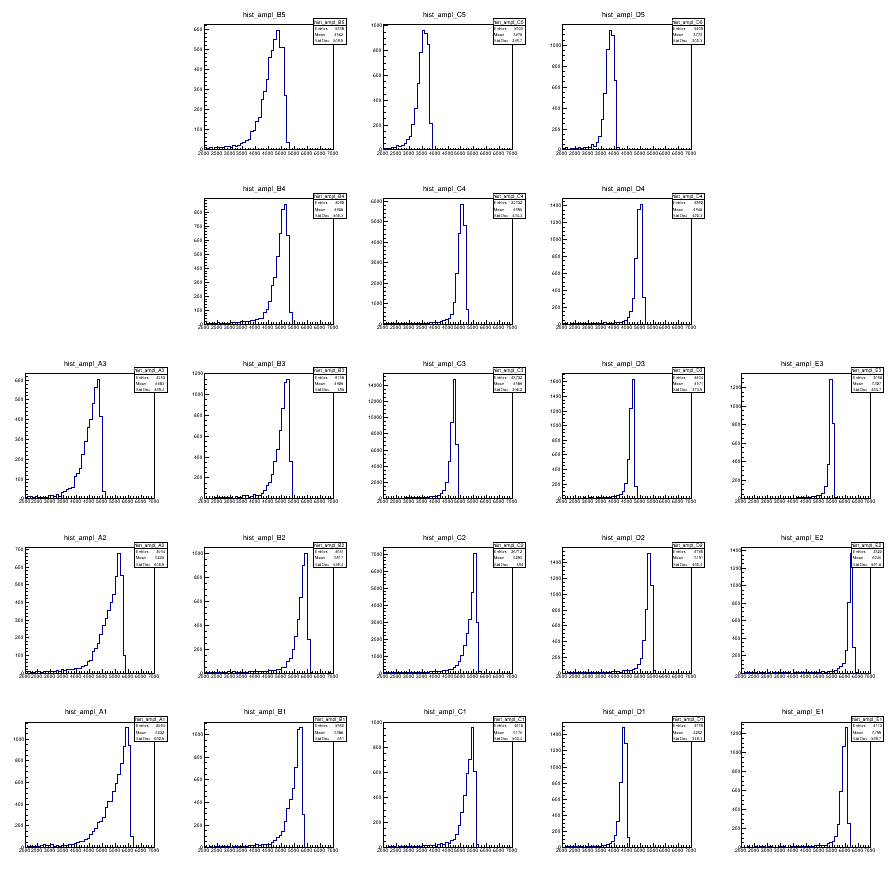

In [27]:
pos_cut = 3

c = ROOT.TCanvas("c","c",900,900)
c.Divide(5,5)
canvas_num=0
files=[]
file_num=0
chi2s = []
results = []
hists_fits=[]
for crystal in naming:
    if crystal in missing:
        canvas_num+=1
    else :
        c.cd(canvas_num+1) 
        run = dict_run_cryst[crystal]
        files.append(ROOT.TFile("/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_%s.root"%run))
        tree = files[file_num].Get("h4")
    
        hist_ampl = ROOT.TH1F("hist_ampl_%s"%crystal,"hist_ampl_%s"%crystal,50,2000,7000)
        tree.Draw("fit_ampl[%s]>>hist_ampl_%s"%(crystal,crystal),"n_tracks==1 && fabs(X-(%.2f))<%.2f && fabs(Y-(%.2f))<%.2f"%(dict_crystal_centers[crystal][0],dict_crystal_centers[crystal][1],pos_cut,pos_cut),"")
       # tree.Draw("fit_ampl[%s]>>hist_ampl_%s"%(crystal,crystal),"n_tracks==1","")
        peak_position = hist_ampl.GetXaxis().GetBinCenter(hist_ampl.GetMaximumBin())
        
        hist_ampl.Draw()
        hists_fits.append(hist_ampl)
        
        canvas_num+=1
        file_num+=1

c.Draw()

## Equalize response for 3x3 matrix wrt to C3

In [53]:
with open('output/intercarlibration_results.json') as json_file:
    fit_results = json.load(json_file)

In [55]:
dict_crystals_calibration = {}

for key in fit_results:
    dict_crystals_calibration[key] = fit_results['C3'][1:2][0][0]/fit_results[key][1:2][0][0]
dict_crystals_calibration

{'A1': 0.7938240251819145,
 'E2': 0.7644343526216207,
 'D1': 1.0839063153761792,
 'E1': 0.7929363844440279,
 'C1': 0.8688353232882132,
 'B1': 0.8317990102307253,
 'B4': 0.9194590488603321,
 'B5': 0.9452385278300514,
 'A3': 0.9718961630713019,
 'A2': 0.8351664722370588,
 'E3': 0.8690204603055319,
 'B2': 0.8083246738209287,
 'B3': 0.9127549976112631,
 'C3': 1.0,
 'C2': 0.8582813249138411,
 'D4': 0.9450934494222665,
 'D5': 1.2016918052843473,
 'D2': 0.8857014596397885,
 'D3': 1.008260228607314,
 'C5': 1.2855290692621217,
 'C4': 0.9330578148760257}

In [30]:
##Read C3 energy scans
dict_C3_energy_scan = {}
#reader = csv.reader(open('../data/intercalibration19C.csv', 'r'))
reader = csv.reader(open('../data/energyscans19C.csv', 'r'))
for row in reader:
    #run,energy,crystal,_ = row
    run,energy,crystal,_,_,_ = row
    if crystal=='C3' :
        if energy in dict_C3_energy_scan.keys() :
            dict_C3_energy_scan[energy].append(run)
        else : 
            dict_C3_energy_scan[energy] = []
            dict_C3_energy_scan[energy].append(run)
dict_C3_energy_scan

{'243.48': ['13360', '13420', '13421'],
 '197.27': ['13368', '13417', '13418', '13419'],
 '149.12': ['13376', '13416'],
 '99.83': ['13383', '13390'],
 '49.99': ['13391']}

In [31]:
#dict_C3_energy_scan={'49.99': ['13416']}

['13360', '13420', '13421']
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13360.root
sumit 7850.0 2945.0
['13368', '13417', '13418', '13419']
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13368.root
sumit 6350.0 3071.0
['13376', '13416']
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13376.root
sumit 4770.0 4712.0
['13383', '13390']
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13383.root
sumit 3170.0 5781.0
['13391']
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13391.root
sumit 2070.0 2.0
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(roohist_fit_243.48): fit range of variable fit_ampl_240GeV expanded to nearest bin boundaries: [6280,9420] --> [6280,8000]
[#1] INFO:Minimization -- Roo

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots/C3_fits_cut3mm.pdf has been created
Info in <TCanvas::Print>: png file plots/C3_fits_cut3mm.png has been created


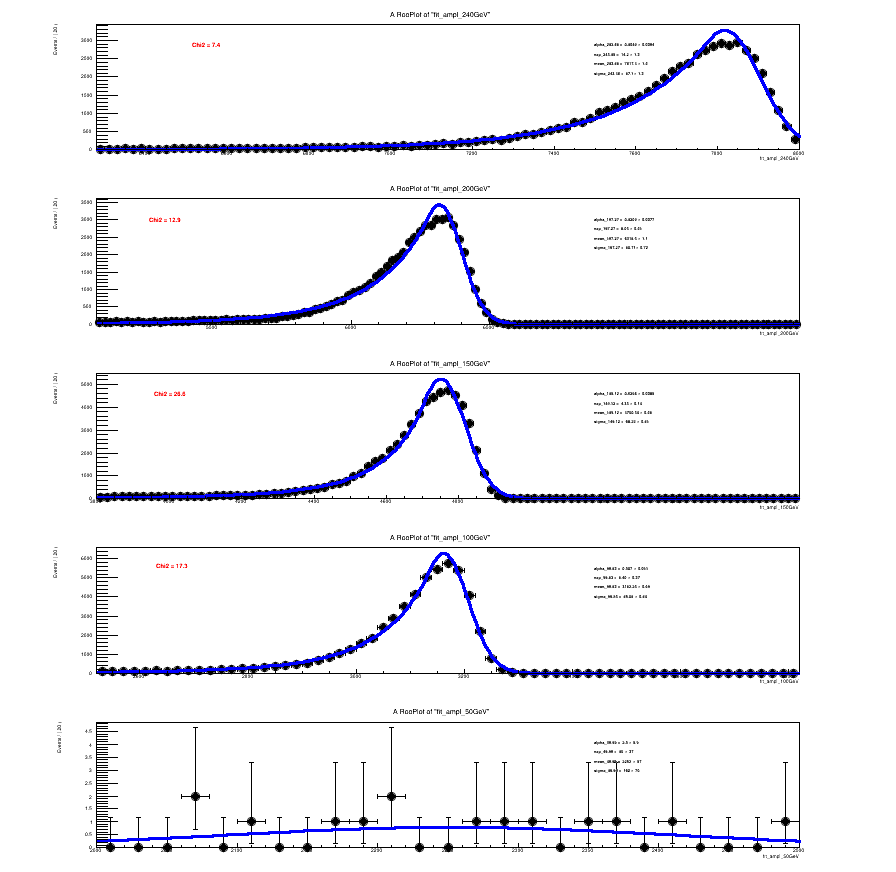

In [32]:
pos_cut = 3

crystal_maps=[]
c = ROOT.TCanvas("c","c",900,900)
c.Divide(1,5)
canvas_num=0
files=[]
file_num = 0
chi2s = []
results = []
hists_fits=[]
trees=[]
crystal="C3"
x,roohist,m,s,a,n,sig,res,frame = [],[],[],[],[],[],[],[],[]
dict_energy_means={}
for energy in dict_C3_energy_scan.keys():
    if crystal in missing:
        canvas_num+=1
    else :
        c.cd(canvas_num+1)
    
        runs = dict_C3_energy_scan[energy]
        print(runs)
        tree = ROOT.TChain("h4")
        for run in runs:
            tree.Add("/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_%s.root"%run)
        print(tree.GetFile().GetName())
        trees.append(tree)
        hist_ampl = ROOT.TH1F("hist_ampl_%s"%energy,"hist_ampl_%s"%energy,300,2000,8000)
        trees[file_num].Draw("fit_ampl[%s]>>hist_ampl_%s"%(crystal,energy),"n_tracks==1 && fabs(X-(%.2f))<%.2f && fabs(Y-(%.2f))<%.2f"%(dict_crystal_centers[crystal][0],dict_crystal_centers[crystal][1],pos_cut,pos_cut),"")
        #hist_ampl.Draw()
        
        peak_position = hist_ampl.GetXaxis().GetBinCenter(hist_ampl.GetMaximumBin())
        ymax_value = hist_ampl.GetMaximum()
        print("sumit",peak_position,ymax_value)


        x.append(RooRealVar("fit_ampl_%dGeV"%round(float(energy),-1),"fit_ampl_%dGeV"%round(float(energy),-1),peak_position*0.8,peak_position*1.2))
        roohist.append(RooDataHist("roohist_fit_%s"%energy,"roohist_fit_%s"%energy,RooArgList(x[file_num]),hist_ampl))

        m.append(RooRealVar("mean_%s"%energy,"mean_%s"%energy,peak_position,peak_position*0.8,peak_position*1.2))
        s.append(RooRealVar("sigma_%s"%energy,"sigma_%s"%energy,60,0,500))
        a.append(RooRealVar("alpha_%s"%energy,"alpha_%s"%energy,0.5,0,10))
        n.append(RooRealVar("exp_%s"%energy,"exp_%s"%energy,7,0,150))
        sig.append(RooCBShape("signal_%s"%energy,"signal_%s"%energy,x[file_num],m[file_num],s[file_num],a[file_num],n[file_num]))

        res.append(sig[file_num].fitTo(roohist[file_num]))#RooFit.Save())
        #res.Print()

        frame.append(x[file_num].frame())
        roohist[file_num].plotOn(frame[file_num],RooFit.Name("roohist_%s"%energy))
        sig[file_num].plotOn(frame[file_num],RooFit.Name("signal_%s"%energy))
        frame[file_num].Draw()
        hists_fits.append(hist_ampl)
        chi2s.append(frame[file_num].chiSquare("signal_%s"%energy,"roohist_%s"%energy,4)) # 4 = nFitParameters from CB

        sig[file_num].paramOn(frame[file_num],RooFit.Layout(0.65,0.99,0.8))
        frame[file_num].getAttText().SetTextSize(0.03)
        
        
        txt_chi2 = ROOT.TText(peak_position*0.83,ymax_value*0.95,"Chi2 = %.1f"%chi2s[file_num])
        txt_chi2.SetTextSize(0.04)
        txt_chi2.SetTextColor(ROOT.kRed)
        frame[file_num].addObject(txt_chi2)
        
        frame[file_num].Draw()

        dict_energy_means[energy] = ['CBmean',[m[file_num].getVal(),m[file_num].getError()],['CBsigma',s[file_num].getVal(),s[file_num].getError()]]

        canvas_num+=1
        file_num+=1
c.Draw()
c.SaveAs('plots/C3_fits_cut%dmm.pdf'%pos_cut)
c.SaveAs('plots/C3_fits_cut%dmm.png'%pos_cut)

In [49]:
with open('../output/01_08_2019_v7/energyscans_C3_results_v7.json') as json_file:
    fit_C3_results = json.load(json_file)
print(fit_C3_results)


[{'49.99': {'CBmean': [1590.0, 267.5877731689111], 'CBsigma': [0.9999990472796607, 0.22961856025552108], 'CBalpha': [-4.349467535663052, 8.404184878546445], 'CBexp': [7.0, 10.677069838773416], 'chi2': 645.3586550232989}}, {'99.83': {'CBmean': [3190.0, 536.8584883074382], 'CBsigma': [0.9999990472796607, 0.22961856025552108], 'CBalpha': [-4.349467535663052, 8.404184878546445], 'CBexp': [7.0, 10.677069838773416], 'chi2': 577.4291084131406}}, {'149.12': {'CBmean': [4810.0, 0.2107397684831085], 'CBsigma': [0.9999990472796607, 2.137158252590865e-07], 'CBalpha': [-4.349467535663052, 4.849466335935329], 'CBexp': [7.0, 0.02779610993697057], 'chi2': 678.1338828392165}}, {'197.27': {'CBmean': [6350.0, 1068.6681507060284], 'CBsigma': [0.9999990472796607, 0.22961856025552108], 'CBalpha': [-4.349467535663052, 8.404184878546445], 'CBexp': [7.0, 10.677069838773416], 'chi2': 1022.6960764308036}}, {'243.48': {'CBmean': [7870.0, 1324.4753300876291], 'CBsigma': [0.9999990472796607, 0.22961856025552108], '

In [65]:
fit_C3_results[0][str(energies[0])]['CBmean'][0]

1590.0

In [69]:
energies = [float(list(fit_C3_results[i].keys())[0]) for i in range(len(fit_C3_results))]
#energies
means_C3 = [fit_C3_results[i][str(energies[i])]['CBmean'][0] for i in range(len(energies))]
#means_C3
means_unc_C3 = [fit_C3_results[i][str(energies[i])]['CBmean'][1] for i in range(len(energies))]
means_unc_C3

[267.5877731689111,
 536.8584883074382,
 0.2107397684831085,
 1068.6681507060284,
 1324.4753300876291]

ADC to GeV convesion factor = 0.024


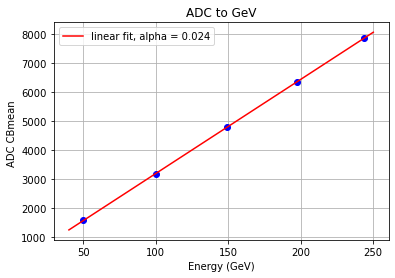

In [72]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def linear_func(x, a, b):
    return a * x + b

fig, ax = plt.subplots()
ax.plot(energies, means_C3,'bo' )
popt, pcov = curve_fit(linear_func, energies, means_C3)

shower_energy = 0.79
conversion_factor = 0.79/popt[0]
print ('ADC to GeV convesion factor = %.3f'%conversion_factor)

xfine = np.linspace(40., 250., 1000)  # define values to plot the function for
ax.plot(xfine, linear_func(xfine, popt[0], popt[1]), 'r-',label='linear fit, alpha = %.3f'%conversion_factor)
ax.set(xlabel='Energy (GeV)', ylabel='ADC CBmean ',
       title='ADC to GeV')

plt.legend()
plt.grid()
plt.show()
fig.savefig('plots/ADC_to_GeV.png')
fig.savefig('plots/ADC_to_GeV.pdf')
dict_crystals_calibration={}

dict_crystals_calibration['conversion_factor'] = conversion_factor
with open('output/conversion_factor.json', 'w') as fp:
    json.dump(dict_crystals_calibration, fp)

### Sum of calibrated energies in matrix 3x3 vs energy

In [86]:
with open('output/energy_sums.json') as json_file:
    energy_sums = json.load(json_file)

fit params :  -0.0011500682609396546 0.18508673338555565
fit params :  -0.003643384227921856 0.8578421243004611


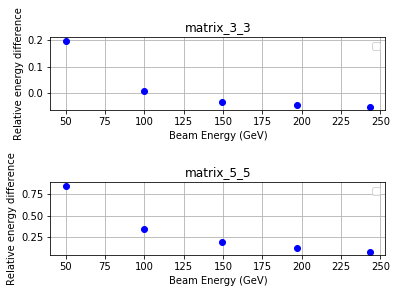

In [125]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def linear_func(x, a, b):
    return a * x + b

fig, ax = plt.subplots(2)
for  num,which_matrix in enumerate(['matrix_3_3','matrix_5_5']):
    energy_sums_list = [energy_sums[which_matrix][str(item)] for item in energies]
    energy_rel_diff = []
    for i in range(0,len(energies)):
        energy_rel_diff.append((energy_sums_list[i]-energies[i])/energies[i])
    ax[num].plot(energies, energy_rel_diff,'bo' )
    popt, pcov = curve_fit(linear_func, energies,energy_rel_diff )
    xfine = np.linspace(40., 250., 1000)  # define values to plot the function for
   # ax[num].plot(xfine, linear_func(xfine, popt[0], popt[1]), 'r-',label='linear fit')
    ax[num].set(xlabel='Beam Energy (GeV)', ylabel='Relative energy difference',
       title='%s'%which_matrix)

    print 'fit params : ',popt[0],popt[1]
    ax[num].grid()
    ax[num].legend()
    
plt.subplots_adjust(hspace=1.)    
plt.show()
fig.savefig('plots/sum_energy_matrices.png')
fig.savefig('plots/sum_energy_matrices.pdf')

In [39]:
fit_results={"A1": ["CBmean", [5989.080143859583, 4.463693430247531], ["CBsigma", 72.64853313476694, 2.668325099671172]], "E2": ["CBmean", [6219.338116649191, 2.880199493472446], ["CBsigma", 71.69228887161219, 2.046382015186431]], "D1": ["CBmean", [4386.242278960872, 3.963709152487354], ["CBsigma", 70.16336177266838, 2.4559222246969696]], "E1": ["CBmean", [5995.784529762981, 2.66318714926183], ["CBsigma", 84.56021137371513, 1.9038305594318459]], "C1": ["CBmean", [5472.010149106919, 6.116574816724551], ["CBsigma", 63.008162367426955, 3.624815994733993]], "B1": ["CBmean", [5715.654441109455, 4.8555977492815146], ["CBsigma", 71.6583336250289, 2.948840103699034]], "B4": ["CBmean", [5170.73132602111, 4.320243228198251], ["CBsigma", 82.2658090390181, 2.7340888392918643]], "B5": ["CBmean", [5029.710032926722, 16.19131826849525], ["CBsigma", 96.9007302987601, 8.904049007301758]], "A3": ["CBmean", [4891.752727895997, 5.6912126265301595], ["CBsigma", 60.27981840261548, 3.3509790511103965]], "A2": ["CBmean", [5692.6084379333315, 2.9670841081365324], ["CBsigma", 73.28504874488664, 1.6714070617762218]], "E3": ["CBmean", [5470.8443864074, 1.478531861351712], ["CBsigma", 64.39137780283704, 1.172606862068978]], "B2": ["CBmean", [5881.641202986372, 4.1176043634905], ["CBsigma", 97.76407257456168, 2.6745663178130457]], "B3": ["CBmean", [5208.709587324014, 3.3299823098609522], ["CBsigma", 81.89092930484048, 2.170012394454261]], "C3": ["CBmean", [4754.275706935694, 0.9885894549292971], ["CBsigma", 62.892137838620386, 0.6407001074678611]], "C2": ["CBmean", [5539.2976276315385, 1.6746776356735609], ["CBsigma", 73.23726612653827, 1.042172840264115]], "D4": ["CBmean", [5030.482128346114, 2.6338375688546876], ["CBsigma", 59.773889088337526, 1.7074242040088237]], "D5": ["CBmean", [3956.3186551070185, 3.936141627779307], ["CBsigma", 77.35125831300707, 2.5013279389853764]], "D2": ["CBmean", [5367.8083683741925, 2.1546658020288305], ["CBsigma", 69.41221545540697, 1.5203158998294342]], "D3": ["CBmean", [4715.326035920968, 2.4720919473566028], ["CBsigma", 57.89690019732674, 1.6624645542675793]], "C5": ["CBmean", [3698.3027615739497, 2.4329678995370614], ["CBsigma", 86.08920416819305, 1.3910785480808485]], "C4": ["CBmean", [5095.370973949121, 1.525826015637449], ["CBsigma", 71.18480477834157, 0.9788955932986809]]}

In [40]:
fit_results['A1'][1:2][0]

[5989.080143859583, 4.463693430247531]

In [51]:
dict_crystals_calibration = {}

for key1 in fit_results:
    dict_crystal={}
    for key2 in fit_results:
        dict_crystal[key2] = fit_results[key1][1:2][0][0]/fit_results[key2][1:2][0][0]
    dict_crystals_calibration[key1] = dict_crystal

In [52]:
dict_crystals_calibration

{'A1': {'A1': 1.0,
  'E2': 0.962977093627824,
  'D1': 1.365423923933001,
  'E1': 0.9988818167380569,
  'C1': 1.09449361033021,
  'B1': 1.0478380394699043,
  'B4': 1.1582655849319081,
  'B5': 1.1907406400473182,
  'A3': 1.2243219306049347,
  'A2': 1.052080115672576,
  'E3': 1.09472683206632,
  'B2': 1.018266830152553,
  'B3': 1.1498203237198497,
  'C3': 1.2597250376377027,
  'C2': 1.0811984743308258,
  'D4': 1.190557881144611,
  'D5': 1.5138012546407433,
  'D2': 1.1157403045805008,
  'D3': 1.2701306544309472,
  'C5': 1.6194131551605873,
  'C4': 1.1753962909628541},
 'E2': {'A1': 1.0384463001427162,
  'E2': 1.0,
  'D1': 1.4179194219345748,
  'E1': 1.03728512687147,
  'C1': 1.1365728401772506,
  'B1': 1.0881235352363197,
  'B4': 1.2027966112551791,
  'B5': 1.2365202120867074,
  'A3': 1.2713925790202818,
  'A2': 1.0925287035739077,
  'E3': 1.1368150284262266,
  'B2': 1.0574154223299705,
  'B3': 1.1940266609957784,
  'C3': 1.3081568045320164,
  'C2': 1.1227665553887958,
  'D4': 1.2363304267